# Introduction to Probability

*The probability of an event is a number between 0 and 1, where, roughly speaking, 0 indicates impossibility of the event and 1 indicates certainty. The higher the probability of an event, the more likely it is that the event will occur. A simple example is the tossing of a fair (unbiased) coin. Since the coin is fair, the two outcomes ("heads" and "tails") are both equally probable; the probability of "heads" equals the probability of "tails"; and since no other outcomes are possible, the probability of either "heads" or "tails" is 1/2 (which could also be written as 0.5 or 50%).* --- [Source](https://en.wikipedia.org/wiki/Probability#:~:text=Probability%20is%20the%20branch%20of,event%20and%201%20indicates%20certainty.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Example: Tossing Coins

Consider the example of tossing a fair coin to root our vocabulary and symbols.  We will say the probability of getting a head is the total ways for this event to happen divided by the number of all possible outcomes.  

**EXAMPLE I**: A Fair Coin

With one fair coin, we have outcomes either heads or tails.  The outcome of interest is either a heads or tails.  We would say the probability of each is $\frac{1}{2}$:

$$P(\text{head}) = \frac{1}{2} \quad P(\text{tails}) = \frac{1}{2}$$

Note that these probabilities sum to 1.

**EXAMPLE II**: An Unfair Coin

An example of an unfair coint would be anything that does not have equal probability.  For example:

$$P(\text{head}) = \frac{4}{10} \quad P(\text{tails}) = \frac{6}{10}$$

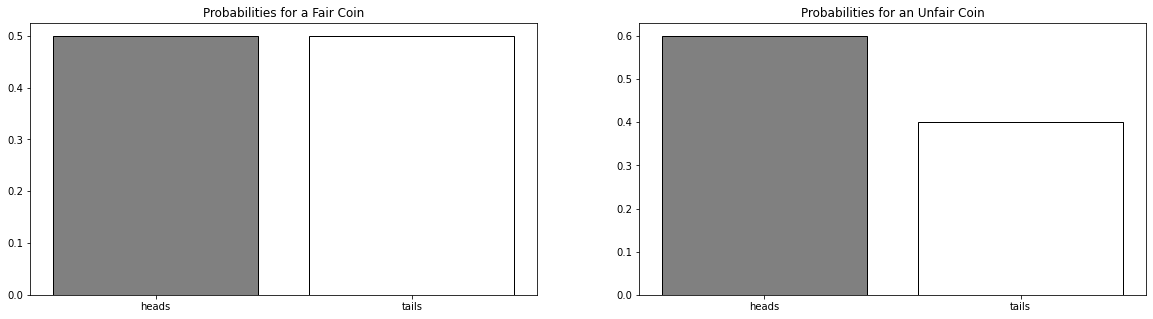

In [2]:
import scipy.stats as stats
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
fair_coin = stats.bernoulli(.5).pmf([0, 1])
ax[0].bar(['heads', 'tails'], fair_coin, color=['gray', 'white'], edgecolor = 'black')
ax[0].set_title('Probabilities for a Fair Coin');

unfair_coin = stats.bernoulli(.4).pmf([0, 1])
ax[1].bar(['heads', 'tails'], unfair_coin, color = ['gray', 'white'], edgecolor = 'black')
ax[1].set_title('Probabilities for an Unfair Coin');

### Probability Mass Function

We can describe this kind of event as a function.  Specifically, a situation in which there are two possible outcomes with a probability attached to each.  This is called a *bernoulli* distribution, and the functional form is:

$$f(k;p)=pk+(1-p)(1-k)\quad {\text{for }}k\in \{0,1\}$$

In our example of an unfair coin, if we consider heads as 0 and tails as 1 ($k$), we would have:

$$f(0, .4) = .4*0 + (1 - .4)(1 - 0)$$



which equals 0.6.  Similarly, the probability of a tails ($k = 0$):

$$f(1, .4) = .4 * 1 + (1 - 1)(1 - 1)$$

which equals 0.4.

In [3]:
def bernoulli(k, p):
    return p*k + (1-p)*(1 - k)

In [4]:
bernoulli(0, 0.4)

0.6

In [5]:
bernoulli(1, 0.4)

0.4

### PROBLEMS

1. Suppose a bag contains 8 Red Marbles and 3 Blue Marbles.  
 - What is the probability of choosing a red ball from a random draw?  
 - A Blue Ball?
2. Suppose a bag contain 4 Red Marbles, 7 Yellow Marbles, and 2 Blue Marbles.
 - What is the probability of selecting a red *or* yellow marble?
 - What is the probability of selecting a yellow *or* blue marble?
 - How many ways can you select two colors of marbles from the bag?
3. Suppose a bag contains 10 Red and 7 Blue marbles. 
 - Suppose you select one marble from the bag, what is the probability this is red?
 - Suppose you select a blue marble, place the marble back in the bag and select another marble.  What is the probability the second marble is blue?
 - Suppose you select a blue marble, do not replace the marble the bag and select another marble.  What is the probability the second marble is blue?

### Origin in Games

Many historians of probability note the emergence of a theory of probability as linked to humans attempts to understand games of chance.  We begin with an early example called Senet that is at least as old as the year 3000 BC.  Here, players moves are decided by dropping 4 paddles with two colored faces.  The players are allowed to move based on the number of colored paddles that are facing up.  Our goal is to explore the likely outcomes of the drops to begin to understand probability.


<center>
    <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Gaming_Board_Inscribed_for_Amenhotep_III_with_Separate_Sliding_Drawer%2C_ca._1390-1353_B.C.E.%2C49.56a-b.jpg/520px-Gaming_Board_Inscribed_for_Amenhotep_III_with_Separate_Sliding_Drawer%2C_ca._1390-1353_B.C.E.%2C49.56a-b.jpg width = 50% />
</center>

**PROBLEM**

The table below begins to explore these possible combinations.  We will look at further examples with more possible combinations but this will get us started.

| sticks | # ways to get 0 white | 1 white | 2 white | 3 white | 4 white | 5 white |
| ------  | ------  | ------  | ------  | ------  | ------  | ------  | 
| 1 | 1 | 1 | na | na | na | na |
| 2 | 1 | 2 | 1 | na | na | na |
| 3 | 1 | 3 | 3 | 1 | na | na |
| 4 | 1 | 4 | 6  | 4 | 1 | na |
| 5 | ? | ? | ?  | ? | ? | ? |
| 6 | ? | ? | ?  | ? | ? | ? |

### Binomial Distribution

The example above is one example of a more general kind of distribution of events.  We have 4 two-sided sticks, and we will treat these as 4 Bernoulli Trials.  To determine the probability of an outcome, we must:

- Count how many ways there are for this specific outcome to occur
- Mutiply this by the probability of successes and failures

As a function, we would have inputs that determine the outcome (success or failure, red or white, heads or tails, etc.), number of successes and failures, and the probability of a success. Below we have the functional form:

$$f(k, n, p) = \Pr(k;n,p)=\Pr(X=k)={\binom {n}{k}}p^{k}(1-p)^{n-k}$$


We unpack this as follows:

- $\binom {n}{k}$ counts the number of ways an outcome can occur.  For example, $\binom{4}{2}$ could be interpreted as how many ways are there to get two white sticks from four total.  
- $p^k$ is the probability of a success to the power of the number of successes.  For example $\frac{1}{2}^2$ would be interpreted as the probability of getting a white stick twice.
- $(1 - p)^k$ is the probability of a failure $n-k$ times.  For example $(1 - \frac{1}{2})^2$ can be interpreted as the probability of a black stick two out of four attempts.

### Using the computer

In [6]:
from scipy.special import comb

In [7]:
#ways to pick 2 things from 4
comb(4, 2)

6.0

In [8]:
#prob of success to the number of successes
(1/2)**2

0.25

In [9]:
#prob of failures to number of failures
(1/2)**2

0.25

In [10]:
#put it all together
n_choose_k = comb(4, 2)
p_to_the_k = (1/2)**2
one_minus_p_to_the_n_minus_k = (1/2)**2
#probability of getting 2 white sticks from four
n_choose_k*p_to_the_k*one_minus_p_to_the_n_minus_k

0.375

### Problems

Suppose we instead play the game of Sennet using 5 sticks.  

1. How many ways are there to get three white sticks?
2. What is the probability that we will get three white sticks?
3. Suppose we toss 10 coins.  How many different outcomes contain exactly three heads?
4. Suppose we toss 20 coins.  How many different outcomes contain exactly three heads?
5. Complete the next two rows of the table for sennet.  Do you recognize a pattern?

### Plotting Distributions

The fourth row of our sennet table contained the values:

$$1 ~ 4 ~ 6 ~ 4 ~ 1$$

We can draw a plot of this using bars to represent the counts of each outcome.  

In [11]:
bars = ['no white', 'one white', 'two white', 'three white', 'four white']
counts = [1, 4, 6, 4, 1]

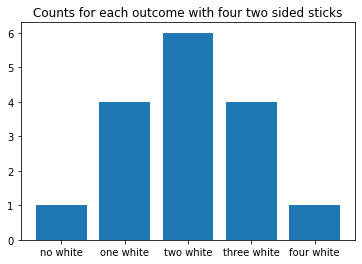

In [12]:
plt.bar(bars, counts)
plt.title('Counts for each outcome with four two sided sticks');

Using this plot, we come back to the problem of determining the probability of a given outcome or outcomes.  Here, we can interpret this probability as the relative area of a given bar to the overall count.  For example, we consider each bar having width of one unit, and height of the count.  Thus, we have a total area of:

$$\textbf{TOTAL AREA} = 1 + 4 + 6 + 4 + 1 = 16$$

This is the total number of possible outcomes.  Thus, determining the probability of a specific outcome is as simple as dividing the total area of our bars by the area under the event of interest.

$$P(\text{two white}) = \frac{\text{area of bar for two white}}{\text{total area}} = \frac{6}{16}$$

### Problems

1. Use the plot above to determine the probability of zero white sticks.
2. Use the plot above to determine the probability of one white stick?
3. What is the probability of one, two, *or* three white sticks and how do we use the graph to determine this.